# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news. 
Outline of the exercise:
* Dataset preparation
* Preprocessing 
* Exploration 
* Word Collections

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name:
# Student Number:

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [2]:
#! pip install pyspark
import pyspark

In [3]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc:SparkContext=spark.sparkContext

23/12/17 17:07:46 WARN Utils: Your hostname, aac resolves to a loopback address: 127.0.1.1; using 172.27.171.205 instead (on interface wlp2s0)
23/12/17 17:07:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/17 17:07:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Reading the data

In [4]:
news_rdd = sc.textFile("sample.txt")
news_rdd.takeSample(False, 3, 12)


['{"body": "به گزارش خبرنگار ورزشی خبرگزاری فارس، جون کنتول، سرمربی آمریکایی هاکی روی چمن بانوان کشورمان سرانجام پس از ماهها انتظار برای صدور ویزا سرانجام وارد تهران شد.\\n\\nبرنامه این سرمربی حضور 12 روزه در ایران و آموزش بازیکنان و مربیان هاکی در دو بخش هاکی چمنی و سالنی است.\\n\\nپایان پیام/", "image_title_url": "https://media.farsnews.ir/Uploaded/Files/Images/1402/06/28/14020628000736_Test_PhotoN.jpg", "language": "fa", "source": "خبرگزاری فارس", "title": "خبرگزاری فارس - سرمربی آمریکایی هاکی بانوان وارد تهران شد", "date_published": 1695116105, "uid": "32c0302672c34598b49fa1492", "url": "https://www.farsnews.ir/news/14020628000785/سرمربی-آمریکایی-هاکی-بانوان-وارد-تهران-شد", "crawler_timestamp": 1695116976, "ingestor_timestamp": 1695132362, "summary": "سرمربی آمریکایی هاکی بانوان امروز وارد ایران شد.", "hostname": "farsnews.ir", "parser_categories": ["ورزشی - سایر حوزه ها"], "keywords": ["سرمربی آمریکایی هاکی روی چمن بانوان", "سرمربی آمریکایی هاکی بانوان", "جون کنت\u200cول", "مربیان

# Section 2: Preprocessing
This section we try to normalize news and remove useless characters (for example /n and /u200c and ...). Also find and remove stop words.

In [5]:
import json
json_rdd = news_rdd.map(lambda x: json.loads(x))

In [6]:
import re
def remove_useless_characters(x):
    useless_charaters = r'[!@#$%^&*()،.؟":{}|<>1234567890\n\u200c۱۲۳۴۵۶۷۸۹۰]'
    x['body'] = re.sub(useless_charaters, "", x['body'])
    return x

"""
TODO
Step 1: Remove useless charachters.
Step 2: Find and Remove stop words.
"""
clean_news_rdd = json_rdd.map(lambda x: remove_useless_characters(x)) #TODO: remove useless charachters
clean_news_rdd.take(12)


[{'body': 'به گزارش خبرگزاری تسنیم از اهواز مردم اهواز امروزدر حمایت از عملیات طوفان الاقصی و محکوم کردن جنایتهای رژیم صهیونیستی علیه مردم فلسطین همزمان با سراسر کشور پس از اقامه نماز جمعه راهپیمایی کردندحضور عشایر مختلف خوزستان مثل همیشه که در همه صحنههای انقلابی مشارکتی هوشمندانه و گسترده دارند در این راهپیمایی با لباسهای زیبای محلی خود حضوری چشمنواز داشتنددر این مراسم راهپیمایان با در دست داشتن پلاکاردهای پایان اسرائیل و تصاویری از کشتار بیرحمانه فلسطینیان حمایت خود را از مردم بیدفاع فلسطین اعلام کرده و آدمکهای رژیم صیهونیستی و استکباری را به آتش کشیدندراهپیمایی کنندگان تنها راه حل مسئله فلسطین را انحلال و زوال رژیم صهیونیستی و خروج صهیونیستهای غاصب از سرزمینهای اشغالی دانستنداین مراسم از مصلی امام خمینی اهواز تا چهارراه آبادان برگزار شد',
  'image_title_url': 'https://newsmedia.tasnimnews.com/Tasnim/Uploaded/Image/1402/07/21/1402072113314626928554064.jpg',
  'language': 'fa',
  'source': 'خبرگزاری تسنیم',
  'title': 'حضور باشکوه مردم خوزستان از مردم مظلوم فلسطینحضور باشکوه مردم خوز

In [7]:
def remove_stop_words(x):
    stop_words = ["و", "در", "به", "از", "که", "این", "را", "با", "های", "برای", "تا", "ها", "است", "یا", "اما", "هم", "نه", "یک",
    "خود", "یکی", "بود", "شد", "می", "شود", "کرد", "او", "ما", "شما", "آن", "آنها", "ایشان", "با", "در", "بر", "برای",
    "به", "روی", "زیر", "بالا", "جلوی", "پشت", "پنجره", "دنبال", "جلو", "پیش", "پس", "نزدیک", "دور", "برخی", "چند",
    "چنین", "چه", "چون", "چگونه", "کجا", "کدام", "که", "کدامین", "کدامیک", "کدامیکی", "کجا", "کی", "چرا", "چطور", "چندین",
    "چند", "چنین", "کسی", "کس", "کدامیک", "کدامین", "کدامیکی", "کدام", "اینکه", "آنکه", "ولی", "اما", "اگر", "هر", "هرکس",
    "هرچه", "همان", "تنها", "وقتی", "تا", "تازه", "الان", "همیشه", "هنوز", "همین", "اول", "حالا", "پیش", "پس", "بار",
    "بارها", "همچنین", "نه", "نیز", "بلکه", "بله", "بلکه", "بلکه", "آره", "آری", "آره", "آری", "آره", "آری", "آره",
    "آری", "هم", "دیگر", "هم", "دیگران", "دیگری", "دیگه", "دیگه", "دیگران", "دیگری", "جلو", "پیش", "پس", "بالا", "پایین"]
    x['body'] = " ".join([word for word in x['body'].split() if word not in stop_words])
    return x
processed_news_rdd = clean_news_rdd.map(lambda x: remove_stop_words(x)) #TODO: find and remove stopwords.
processed_news_rdd.take(10)

[{'body': 'گزارش خبرگزاری تسنیم اهواز مردم اهواز امروزدر حمایت عملیات طوفان الاقصی محکوم کردن جنایتهای رژیم صهیونیستی علیه مردم فلسطین همزمان سراسر کشور اقامه نماز جمعه راهپیمایی کردندحضور عشایر مختلف خوزستان مثل همه صحنههای انقلابی مشارکتی هوشمندانه گسترده دارند راهپیمایی لباسهای زیبای محلی حضوری چشمنواز داشتنددر مراسم راهپیمایان دست داشتن پلاکاردهای پایان اسرائیل تصاویری کشتار بیرحمانه فلسطینیان حمایت مردم بیدفاع فلسطین اعلام کرده آدمکهای رژیم صیهونیستی استکباری آتش کشیدندراهپیمایی کنندگان راه حل مسئله فلسطین انحلال زوال رژیم صهیونیستی خروج صهیونیستهای غاصب سرزمینهای اشغالی دانستنداین مراسم مصلی امام خمینی اهواز چهارراه آبادان برگزار',
  'image_title_url': 'https://newsmedia.tasnimnews.com/Tasnim/Uploaded/Image/1402/07/21/1402072113314626928554064.jpg',
  'language': 'fa',
  'source': 'خبرگزاری تسنیم',
  'title': 'حضور باشکوه مردم خوزستان از مردم مظلوم فلسطینحضور باشکوه مردم خوزستان از مردم مظلوم فلسطین - تسنیم',
  'date_published': 1697179554,
  'uid': 'f53f5316d207979b6b3164bcd',
 

# Section 3: Exploration
Please answer the following questions regarding the dataset:
- what are the titles and urls of 5 longest news?
- what are the 20 most frequent words? (Plot the distribution of these words)
- find the `word clouds` of the news.
    - you need to use `keywords` field.
    - score = $2^{log_{10}(count)}$ ( count is the number of the each keyword)
    - you should normalize scores.
    - use ***wordcloud*** package for showing the result.
- plot a timeline which shows total count of news per each day.
- plot a timeline which shows total count of news per each day that have at least one of the word clouds.
- what is your inference about the below timeline.

In [49]:
# Titles and URLs of 5 longest news
def convert_to_json(x):
    new_obj = {'length': x[0], 'title': x[1][0], 'url': x[1][1]}
    return new_obj
longest_news_rdd1 = processed_news_rdd.map(lambda x:  (len(x['body']), (x['title'], x['url']))).sortByKey(ascending=False)
longest_news_rdd2 = longest_news_rdd1.map(convert_to_json)
longest_news_rdd2.take(10)

[{'length': 8887,
  'title': 'تشریح ابعاد راهبردی عملیات طوفان\u200cالاقصی در جمع قرآنیان',
  'url': 'http://iqna.ir/fa/news/4178601'},
 {'length': 8210,
  'title': 'واگذاری ۱۰ هزار و ۲۰۰ واحد مسکونی به متقاضیان در فارس',
  'url': 'http://www.javanonline.ir/fa/news/1191209'},
 {'length': 7913,
  'title': 'مچ\u200cاندازی در بازار اجاره',
  'url': 'https://donya-e-eqtesad.com/بخش-%D9%85%D8%B3%DA%A9%D9%86-%D8%B9%D9%85%D8%B1%D8%A7%D9%86-18/4005080-%D9%85%DA%86-%D8%A7%D9%86%D8%AF%D8%A7%D8%B2%DB%8C-%D8%AF%D8%B1-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%A7%D8%AC%D8%A7%D8%B1%D9%87'},
 {'length': 7611,
  'title': 'واکنش\u200cهای جهانی در اولین سالگرد مهسا؛ بیانیه رهبران و تحریم\u200cهای جدید علیه جمهوری اسلامی',
  'url': 'https://www.iranintl.com/202309154306'},
 {'length': 6419,
  'title': 'گلباران مزار شهدا ',
  'url': 'http://khorasanshomali.khorasannews.com/Newspaper/Page/21319/2/237736/0'},
 {'length': 6355,
  'title': 'صرفه\u200cجویی 2 هزار میلیاردی در ساخت 1 میلیون مسکن با کاهش 20 هزار تومانی ه

In [50]:
news_words_rdd = processed_news_rdd.flatMap(lambda x: x['body'].split(" ")) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.sortByKey(ascending=False)
top_twenty_news_words_rdd = sc.parallelize(news_words_rdd.take(20))
top_twenty_news_words_rdd.collect()

[(734, 'شده'),
 (579, 'گفت'),
 (521, 'ایران'),
 (470, 'کشور'),
 (460, 'سال'),
 (436, 'استان'),
 (402, 'گزارش'),
 (344, 'اسلامی'),
 (338, 'دارد'),
 (332, 'قرار'),
 (331, 'کرده'),
 (330, 'مردم'),
 (328, 'روز'),
 (317, 'غزه'),
 (315, 'رژیم'),
 (315, 'باید'),
 (312, 'ادامه'),
 (303, 'خواهد'),
 (293, 'هزار'),
 (291, 'میشود')]

/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


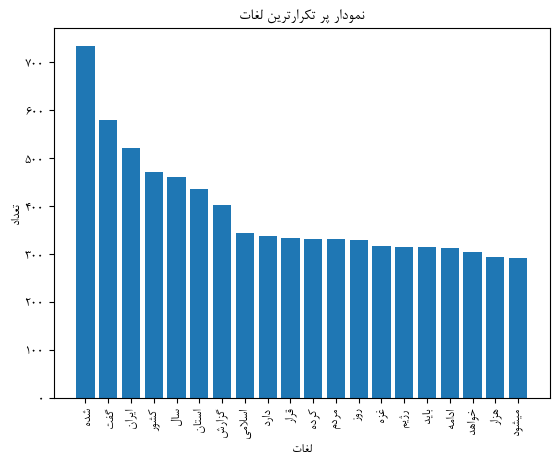

In [51]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import arabic_reshaper
from bidi.algorithm import get_display
font_path = '/home/aac/Desktop/HW1/B-NAZANIN.TTF'
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'B Nazanin'
# Use the font file in Matplotlib
def prepare_arabic_text(text):
    return get_display(arabic_reshaper.reshape(u'%s' % str(text)))

numbers = top_twenty_news_words_rdd.map(lambda tup: tup[0]).collect()

words = top_twenty_news_words_rdd.map(lambda tup: tup[1]).collect()
words = [prepare_arabic_text(word) for word in words]

# Plot the bar chart using Matplotlib
plt.bar(words, numbers)
plt.xlabel(prepare_arabic_text('لغات'))
plt.xticks(rotation=90)
plt.ylabel(prepare_arabic_text('تعداد'))
plt.title(prepare_arabic_text('نمودار پر تکرارترین لغات'))
plt.show()

In [52]:
import math
def custom_keywords_flat_map(x):
    if "keywords" in x:
        return x['keywords']
    else:
        return []
keywords_rdd = processed_news_rdd.flatMap(custom_keywords_flat_map) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x + y) \
.map(lambda x: (x[1], x[0])) \
.map(lambda x: (2**(math.log10(x[0])), x[1])) \
.sortByKey(ascending=False)

maximum_score = keywords_rdd.take(1)[0][0]
normalized_keywords_rdd = keywords_rdd.map(lambda x: (x[0]/maximum_score, x[1])) 
normalized_keywords_rdd.collect()

[(1.0, 'رژیم صهیونیستی'),
 (0.788715729048328, 'اسرائیل'),
 (0.7374756427772624, 'جمهوری اسلامی ایران'),
 (0.7374756427772624, 'جمهوری اسلامی'),
 (0.6762968642220912, 'آموزش و پرورش'),
 (0.6401790292584381, 'تیم ملی'),
 (0.6401790292584381, 'رجب طیب اردوغان'),
 (0.6401790292584381, 'وزیر امور خارجه'),
 (0.6401790292584381, 'لیگ برتر'),
 (0.6401790292584381, 'جنگ'),
 (0.6401790292584381, 'اسلام'),
 (0.6401790292584381, 'وزیر امور خارجه جمهوری اسلامی ایران'),
 (0.6401790292584381, 'فلسطین'),
 (0.6401790292584381, 'بانک مرکزی'),
 (0.5985888498312956, 'صهیونیست'),
 (0.5985888498312956, 'ایران'),
 (0.5985888498312956, 'انقلاب اسلامی'),
 (0.5985888498312956, 'رهبر معظم انقلاب'),
 (0.5985888498312956, 'جبهه مقاومت'),
 (0.5985888498312956, 'ایالات متحده آمریکا'),
 (0.5985888498312956, 'تل آویو'),
 (0.5985888498312956, 'بورس'),
 (0.5985888498312956, 'طرح نهضت ملی مسکن'),
 (0.5985888498312956, 'رئیس جمهور'),
 (0.5985888498312956, 'غزه'),
 (0.5985888498312956, 'بنیامین نتانیاهو'),
 (0.54893170515

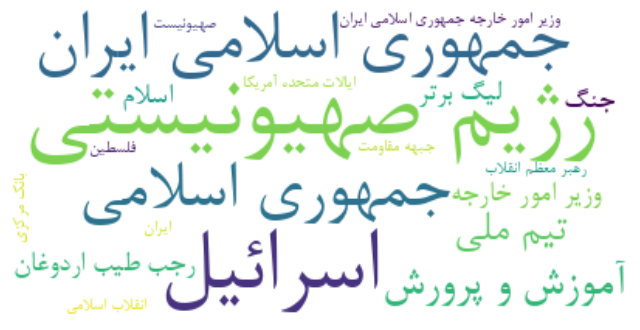

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_score_dict = {tup[1]: tup[0] for tup in normalized_keywords_rdd.take(20)}

wordcloud = WordCloud(font_path=font_path, background_color='white').generate_from_frequencies(word_score_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


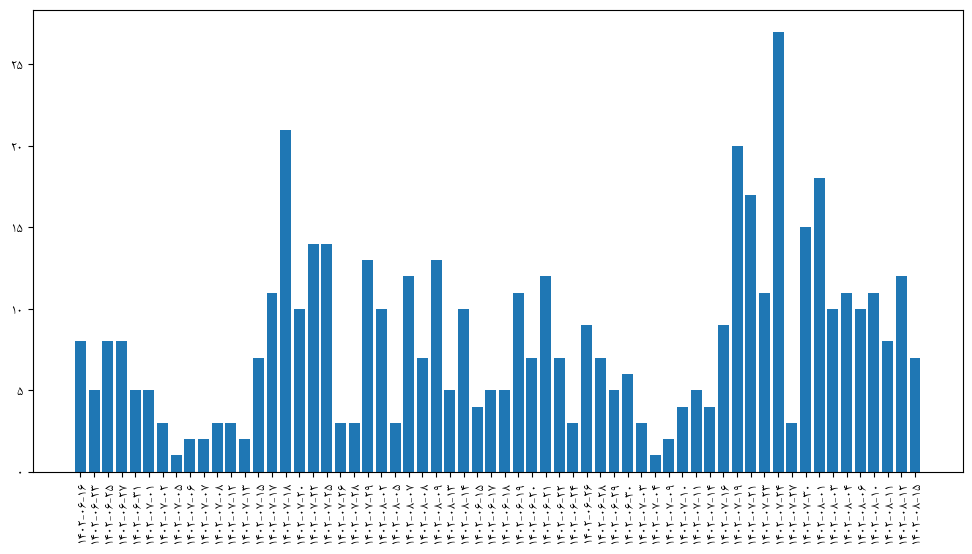

In [79]:
from datetime import datetime
import matplotlib.pyplot as plt
from khayyam import JalaliDatetime
persian_datetime = JalaliDatetime.fromtimestamp(float(1699171008))
persian_datetime.strftime('%Y-%m-%d')
def timestamp_to_persian_date(timestamp):
    # return datetime.utcfromtimestamp(float(timestamp)).strftime('%Y-%m-%d')
    persian_datetime = JalaliDatetime.fromtimestamp(float(timestamp))
    return persian_datetime.strftime('%Y-%m-%d')

news_published_dates_rdd = processed_news_rdd.map(lambda x: x['date_published']) \
.map(lambda x: (x, 1)) \
.sortByKey() \
.map(lambda x: timestamp_to_persian_date(x[0])) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y)
published_news_count = news_published_dates_rdd.map(lambda tup: tup[1]).collect()
dates = news_published_dates_rdd.map(lambda tup: tup[0]).collect()
plt.figure(figsize=(12, 6))
plt.bar(dates, published_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()



/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/aac/Desktop/HW1/hw_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


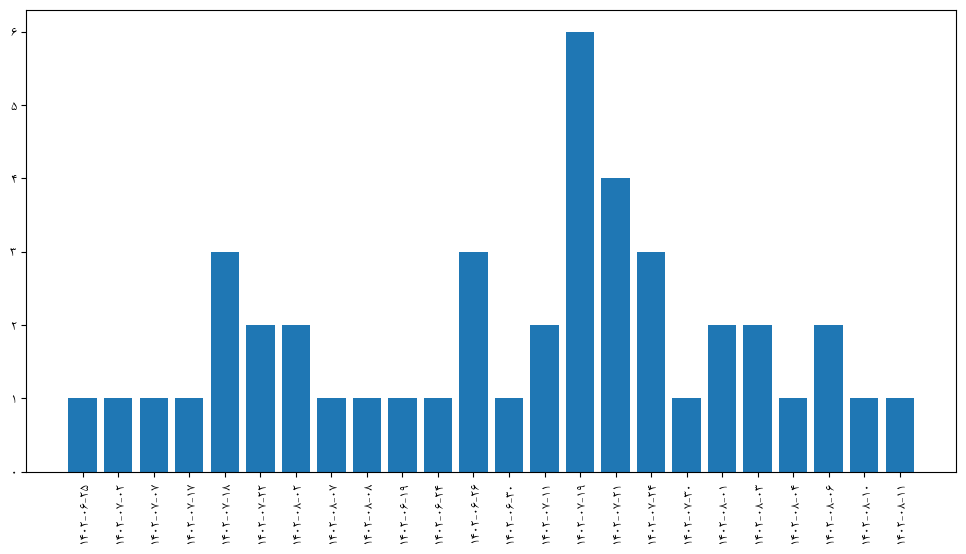

In [111]:
list_of_words_in_wordcloud = [word[1] for word in normalized_keywords_rdd.take(100)]
def check_keyword_in_wordcloud(x):
    if "keywords" in x:
        keywords = x['keywords']
        for keyword in keywords:
            if keyword in list_of_words_in_wordcloud:
                return True
            else:
                return False
    else:
        return False

processed_news_contain_wordcloud_rdd = processed_news_rdd.filter(check_keyword_in_wordcloud) \
.map(lambda x: x['date_published']) \
.map(lambda x: (x, 1)) \
.sortByKey() \
.map(lambda x: timestamp_to_persian_date(x[0])) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x, y: x+y)
published_wordcloud_news_count = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[1]).collect()
dates = processed_news_contain_wordcloud_rdd.map(lambda tup: tup[0]).collect()
plt.figure(figsize=(12, 6))
plt.bar(dates, published_wordcloud_news_count, width=0.8)
plt.xticks(rotation=90)
plt.show()

# Section 4: Son, A-prior algorithm
- In this section we want to find 3-sets words collections that appear together the most.
    - What is your idea to solve the problem?
    - Implement an algorithm for doing so.
    - What is the most pertinant 3-sets words?
- Now we want to test the results and know that how valid is the model.
    - How we can test the model?
    - Explain and implement a scenario to test the model with using `tf-idf`.

In [ ]:
# TODO: find the answers of the above questions. 